# Green AI project : Water polution

## I - Importations

In [2519]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import warnings

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

## II - Adding the dataset

### a - Adding the datasets

In [2520]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
target = pd.read_csv("Target.csv")
submission = pd.read_csv("Submission.csv")

### b - Concatenate the datasets 

In [2521]:
df = pd.concat([train, test])
targets = pd.concat([target, submission])

df['polution'] = targets['polution']
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(columns= ['period'])
df.head()

df_copy = df


## III -  Data cleaning

### a - Informations about the dataset

Shape of the dataframe

In [2522]:
print("DataFrame shape : ",df.shape)

DataFrame shape :  (2440, 17)


Printing the columns

In [2523]:
print(df.columns)

Index(['code', 'year', 'id', 'Country', 'tourists', 'venue', 'rate', 'food',
       'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste',
       'waste_recycling', 'polution'],
      dtype='object')


Description of the dataset

In [2524]:
df.describe()

,year,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
count,2440.000000,2.440000e+03,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000
mean,2008.626230,4.767223e+07,0.087705,9.303433,29.425033,7.436033,3.145266,24.254406,19.633000,12.139074,0.205115,1.505984,24.320622,0.083942
std,1.199139,2.479095e+07,0.590075,25.756588,9.788147,3.457790,1.000299,6.377738,4.147889,5.125774,0.828159,3.497798,6.170708,0.121450
min,2005.000000,5.300380e+05,0.000000,0.000000,14.180000,2.200000,1.380000,0.000000,6.100000,1.450000,0.000000,0.000000,0.760000,0.001000
25%,2008.000000,2.586796e+07,0.000000,0.000000,16.700000,2.200000,3.000000,26.000000,18.900000,9.000000,0.000000,0.000000,22.260000,0.018936
50%,2009.000000,5.094169e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,0.048790
75%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.500000,28.200000,20.000000,20.200000,0.000000,2.700000,27.250000,0.104649
max,2017.000000,7.117635e+07,7.000000,87.158924,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,4.000000,19.180000,47.830000,1.323967


### b - Searching for missing values

Print the missing values per columns

In [2525]:
def cheking_for_missing_values() : 
    missing_values = df.isnull().sum()
    print("\nTotal missing values in each column:")
    print(missing_values)

cheking_for_missing_values()


Total missing values in each column:
code                0
year                0
id                  0
Country            18
tourists            0
venue               0
rate                0
food                0
glass               0
metal               0
other               0
paper               0
plastic             0
leather             0
green_waste         0
waste_recycling     0
polution            0
dtype: int64


Drop the missing values and print the result

In [2526]:
df = df.dropna()
cheking_for_missing_values()


Total missing values in each column:
code               0
year               0
id                 0
Country            0
tourists           0
venue              0
rate               0
food               0
glass              0
metal              0
other              0
paper              0
plastic            0
leather            0
green_waste        0
waste_recycling    0
polution           0
dtype: int64


### c - Encode the string values

##### 1 - Encode the Country column

In [2527]:
# We create a mapping of the countries and add the column 'Country_mapped' to the dataset
countries = df['Country'].unique()
mapping_country = {value: i+1 for i, value in enumerate(countries)}
df['Country_mapped'] = df['Country'].map(mapping_country)

# Then we insert it next to the 'Country' column and drop the 'Country' column
colonne = df.pop('Country_mapped')
df.insert(4, 'Country_mapped', colonne)
df = df.drop(columns= ['Country'])

df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,CAS_7723-14-0,2009,ES014MSPFES-014-NR-038-000-02-02,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,CAS_7723-14-0,2009,FRGR0220,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,CAS_14265-44-2,2009,FRGR1496,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,CAS_7723-14-0,2009,FRDR174,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,CAS_7723-14-0,2009,FRGR1022,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


##### 2 - Encode the 'id' and 'code' column

In [2528]:
le = LabelEncoder()

df['id'] = le.fit_transform(df['id'])
df['code'] = le.fit_transform(df['code'])

df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,1,2009,159,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,1,2009,848,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,0,2009,973,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,1,2009,498,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,1,2009,965,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


### d - Drop any duplicate

In [2529]:
df.drop_duplicates(inplace=True)

### e - Delete the extrems values

##### 1 - Boxplot

In [2530]:
subset_df = df[['rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling']]

fig = px.box(subset_df, title='Highlighting outliers')
fig.update_layout(xaxis_title='Variable', yaxis_title='Value')
fig.show()

##### 2 - Delete extrem values

We decide to exclude the countries in deleting the extrem values so that we keep country diversity

We exclude the polution because it's the target value

We exclude the venue, leather and rate because if we don't, the value we get for every row is 0

In [2531]:
Q1 = df.drop(columns=['Country_mapped','polution','venue','leather','rate']).quantile(0.10)
Q3 = df.drop(columns=['Country_mapped','polution','venue','leather','rate']).quantile(0.90)
IQR = Q3 - Q1

# Utilisez la méthode loc pour filtrer les lignes sur les colonnes spécifiques
df = df.loc[~((df.drop(columns=['Country_mapped','polution','venue','leather','rate']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['Country_mapped','polution','venue','leather','rate']) > (Q3 + 1.5 * IQR))).any(axis=1)]

##### 3 - Find if we need to delete columns that have only one value 

df_copy is a copy of the df before we did changes on it to compare

Here we can see that the leather column has only one value now so we must drop it 

In [2532]:
venue_before = df_copy['venue'].unique()
venue_after = df['venue'].unique()

leather_before = df_copy['leather'].unique()
leather_after = df['leather'].unique()

rate_before = df_copy['rate'].unique()
rate_after = df['rate'].unique()

print(f'Venue before : {venue_before} and after {venue_after}\nLeather before {leather_before} and after {leather_after}\nRate before {rate_before} and after {rate_after}')

Venue before : [4. 0. 5. 1. 3. 2. 7. 6.] and after [4. 0. 5. 1. 3. 6. 2.]
Leather before [0.   1.96 4.   0.4  3.6 ] and after [0.]
Rate before [87.15892368  0.         10.92804972 11.09062195 22.00044929 11.09255897
 21.17940436 21.86710188 22.19835663 11.01392873 21.93875376] and after [87.15892368  0.         11.09062195 22.00044929 21.17940436 11.01392873
 21.93875376]


In [2533]:
df = df.drop(columns=['leather'])

#### 4 - Boxplot after taking out the extrem values

Now we do the same plot as just before to se the difference

In [2534]:
subset_df = df[['rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'green_waste', 'waste_recycling']]

fig = px.box(subset_df, title='Highlighting outliers')

fig.update_layout(xaxis_title='Variable', yaxis_title='Value')

fig.show()

##  IV - Data visualisation

### a - Take back the Country column

In [2535]:
# Create a function to inverte the mapping we did in the cleaning step
def invert_mapping(mapping):
    return {v: k for k, v in mapping.items()}

# Invert the mapping using the function we just did
inverted_mapping = invert_mapping(mapping_country)

# Create a columns with the countries using the mapping 
Country = [inverted_mapping[valeur] for valeur in df['Country_mapped']]

#Adding the new column to the dataset df
df['Country'] = Country

df.head()


,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
0,1,2009,159,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.013212,Spain
1,1,2009,848,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.057482,France
2,0,2009,973,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037835,France
3,1,2009,498,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.055119,France
4,1,2009,965,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037617,France


### b - Pie of countries

In [2536]:
# We initialize a variable to get the count of every country
count_country = df['Country'].value_counts()

# As some countries has very few occurencies we plot all of them in the 'others < 10' category 
limit = 10
# Here we create the Other category with every country with less occurences than the limit
count_country['Others < 10'] = count_country[count_country < limit].sum()
# Then we drop the countries under the limit
count_country = count_country[count_country >= limit]

# Then we plot the pie
fig = px.pie(count_country, values=count_country.values, names=count_country.index, 
             title='Diagram of the country repartition')

fig.show()

What can we get from this plot : 

The majority of our dataset is about polution in France and United Kingdom. 
Maybe the fact that we don't have a lot of informations about some countries can impact the predictions. 

We can manage it with : 
- Seeing a plot of the mean value of polution per country 
- See if the predictions accurate on the less represented countries

### c - Visualisation of the mean pollution for each country with indicated the number of values per country 

In [2537]:
average_pollution = df.groupby('Country')['polution'].mean().reset_index()
total_mean_pollution = df['polution'].mean()

fig = px.bar(average_pollution, x='Country', y='polution',
             title='Mean pollution per country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Mean pollution')

fig.add_hline(y=total_mean_pollution, line_dash="dash", line_color="red", annotation_text=f"Total Mean: {total_mean_pollution:.2f}",
              annotation_position="top right")

fig.show()

In [2538]:
count_romania = (df['Country'] == 'Romania').sum()
print(f'Number of rows about Romania : {count_romania}')

Number of rows about Romania : 1


Initially, a conspicuous observation is the exceptionally high value in the Romania column. Upon further investigation, we discovered that Romania appears only once in the dataset. Considering this outlier, we opt to remove the Romania entry, as its value appears disproportionately high compared to other countries.

Subsequently, let's generate a plot excluding this outlier for a clearer representation.

In [2539]:
# Delete the value Romania
df = df[df['Country'] != 'Romania']

In [2540]:
# Do the same plot without the Romania value
average_pollution = df.groupby('Country')['polution'].mean().reset_index()
total_mean_pollution = df['polution'].mean()

fig = px.bar(average_pollution, x='Country', y='polution',
             title='Mean pollution per country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Mean pollution')

fig.add_hline(y=total_mean_pollution, line_dash="dash", line_color="red", annotation_text=f"Total Mean: {total_mean_pollution:.2f}",
              annotation_position="top right")

fig.show()

With the red line indicating the updated mean pollution value for all countries (excluding Romania), it's evident that each country's pollution levels hover around this mean. Ranging from 0.02 for Ireland to 0.2 for Belgium, there is no compelling need to exclude any other countries from the analysis.

### d - Average polution by years

In [2541]:
average_pollution_by_year = df.groupby('year')['polution'].mean().reset_index()

fig = px.line(average_pollution_by_year, x='year', y='polution', 
              title='Pollution evolution by years', markers=True)

fig.update_layout(xaxis_title='Year', yaxis_title='Mean pollution', showlegend=False)

fig.show()

year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

fig = px.pie(year_counts, values='Count', names='Year', 
             title='Year distribution', hole=0.4)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

We plotted the mean pollution values per year alongside the proportion of rows for each respective year. For instance, despite the notably high mean value in the year 2014, we need to consider that there are only 5 rows associated with this year. Let's examine these specific entries to gain a more detailed understanding.

In [2542]:
df_2014 = df[df['year'] == 2014]
df_2014.head(5)

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
925,0,2014,169,1,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.336472,Spain
1748,0,2014,266,1,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.491643,Spain
1923,0,2014,242,1,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.058269,Spain
2056,0,2014,174,1,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.541743,Spain
23,0,2014,168,1,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.104649,Spain


Now we have all the values about 2014 and it's only about Spain


In [2543]:
mean_polution_per_year_spain = df[df['Country'] == 'Spain'].groupby('year')['polution'].mean().reset_index()

fig = px.line(mean_polution_per_year_spain, x='year', y='polution', title='Mean Pollution per Year in Spain')
fig.update_layout(xaxis_title='Year', yaxis_title='Mean Pollution')
fig.show()

The mean values appear to be within reasonable limits compared to previous years, so we will retain these values. Furthermore, the last plots highlight that Spain exhibits a higher mean pollution value compared to the overall mean values across all countries.

### e - Barplot type of polution

In [2544]:
categories = ['glass', 'food', 'metal', 'other', 'paper', 'plastic', 'green_waste']
color = ['#264653', '#226D68', '#2A9D8F', '#E9C46A', '#F4A261', '#C23028', '#77221D']

average_by_country = df.groupby('Country')[categories].mean().reset_index()

fig = px.bar(average_by_country, x='Country', y=categories,
             color_discrete_sequence=color, title='Average Waste by Country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Average Waste',
                  legend_title='Categories')

fig.show()

In the visualizations, it's evident that "food" and "other" categories dominate across countries, indicating their widespread presence. Additionally, the absence of "green_waste" in some countries is noteworthy. Notably, "metal" appears consistently in all countries but at relatively low proportions, emphasizing its universal but less prevalent occurrence.

### Test pour faire une carte 

In [2545]:
def Create_a_map(df) : 
    # Importations to get the API 
    import requests
    import folium
    from folium.plugins import MarkerCluster

    # The website to get the key : https://opencagedata.com/api#quickstart
    api_key = '083de99a857b469db296e7b6d42f75c3'

    # Here we create a new dataFrame with one row per country and the mean values per countries
    means_by_country = df.groupby('Country').mean().reset_index()

    # Here we created a function to get the localisation of each countries
    def get_lat_lon(country):
        url = f'https://api.opencagedata.com/geocode/v1/json?q={country}&key={api_key}'
        response = requests.get(url)
        data = response.json()

        if len(data['results']) > 0:
            location = data['results'][0]['geometry']
            return location['lat'], location['lng']
        else:
            return None, None

    # We use the function we just did to get the latitude and longitude of every country and add it to the dataframe
    means_by_country[['Latitude', 'Longitude']] = means_by_country['Country'].apply(lambda country: pd.Series(get_lat_lon(country)))

    # We create the map
    world_map = folium.Map(location=[0, 0], zoom_start=2)

    # Create all the points on the map 
    marker_cluster = MarkerCluster().add_to(world_map)

    for index, row in means_by_country.iterrows():
        # For each country (row) we create a marker using the latitude and longitude column to place it 
        # Then we add the pop with the important informations : the name of the country, the number of tourists, the polution rounded so that it's readable,
        # and the waste_recycling. 
        # Then we choose a maximum width so that it's more readable too
        folium.Marker([row['Latitude'], row['Longitude']],
                      popup=folium.Popup(
                          f"Country: {row['Country']}<br>Tourists: {row['tourists']}<br>Pollution: {round(row['polution'], 2)}<br>Waste recycling: {row['waste_recycling']}",
                          max_width=300 
                      ),
                      # Here we choose to make the markers red when the polution is over the mean polution value and in green the ones that are under the mean polution value
                      icon=folium.Icon(color='red' if row['polution'] > 0.08 else 'green')).add_to(marker_cluster)

    # Then we save it in an html file to get into the web page
    world_map.save("tourists_map.html")
    return world_map

map = Create_a_map(df)
map

## V - Preparation for modeling

### a - Deleting the Country column used fot the visualisations

In [2547]:
df = df.drop(columns= ['Country'])
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution
0,1,2009,159,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.013212
1,1,2009,848,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.057482
2,0,2009,973,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037835
3,1,2009,498,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.055119
4,1,2009,965,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037617


In [2548]:
venue_before = df_copy['venue'].unique()
venue_after = df['venue'].unique()

print(f'Venue before : {venue_before} and after {venue_after}\nLeather before {leather_before} and after {leather_after}')

Venue before : [4. 0. 5. 1. 3. 2. 7. 6.] and after [4. 0. 5. 1. 3. 6. 2.]
Leather before [0.   1.96 4.   0.4  3.6 ] and after [0.]


### b - Heatmap

<Axes: >

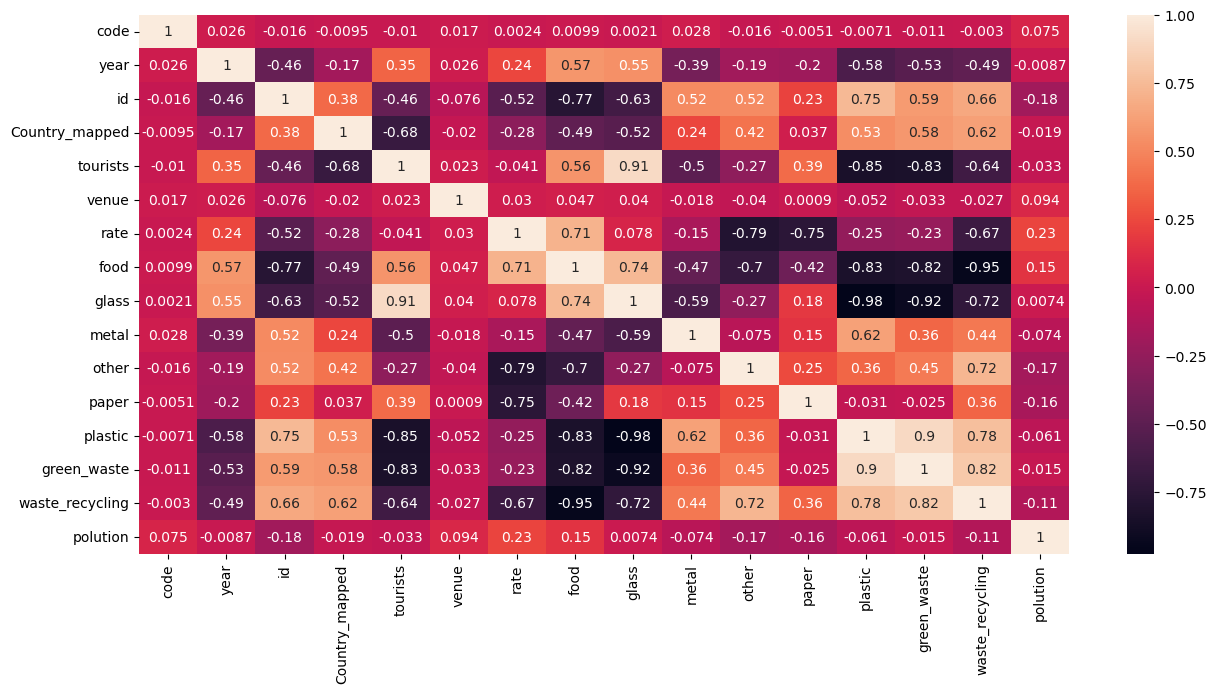

In [2549]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True)


### b - Delete the columns with high correlation

In [2550]:
correlation_matrix = df.corr()

correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.92:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)
            
print(f'The columns we have to drop are : {correlated_columns}')
            
df_no_corr = df.drop(columns=correlated_columns)

The columns we have to drop are : {'plastic', 'waste_recycling'}


### e - Standardisation

In [2551]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

In [2552]:
target = df['polution']
df = df.drop(columns=['polution'])

In [2553]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_standardized,target,train_size = 0.75,random_state=42)

## VI - Modeling

In [2554]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#### Linear regression

In [2555]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2556]:
ML_pipeline = make_pipeline(PCA(n_components=2),LinearRegression())
ML_pipeline.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('linearregression', LinearRegression())])